In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
df = pd.read_csv("./radius.csv")
feature_names = ["Average_radius", "Max_radius", "Min_radius"]

X = df[feature_names]
y = df["Channel"]
y = y.map({'KCN': 1, 'SCN': 0}).astype(int)

In [18]:
# standarize data

scalar = StandardScaler()
X = scalar.fit_transform(X)

# Decision Tree

In [19]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)

In [20]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.90
|   |--- feature_0 <= -1.42
|   |   |--- feature_0 <= -1.88
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.88
|   |   |   |--- class: 1
|   |--- feature_0 >  -1.42
|   |   |--- class: 0
|--- feature_1 >  0.90
|   |--- class: 1



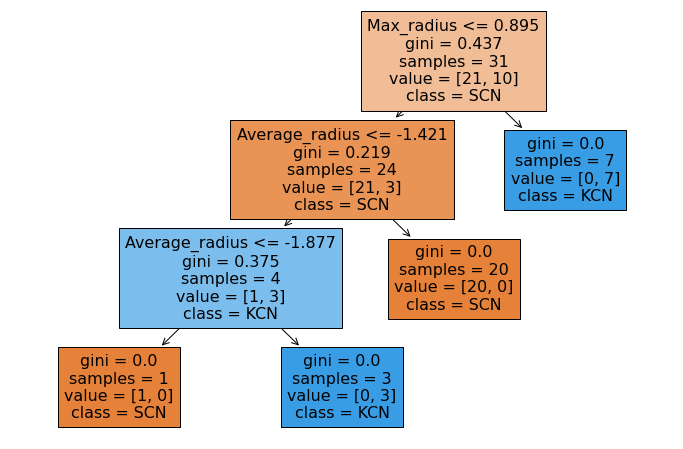

In [21]:
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=df["Channel"].unique(), filled=True)

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


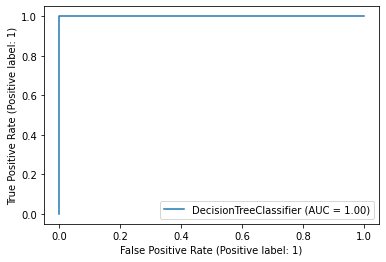

In [22]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# Logistic Regression

In [23]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X, y)

In [24]:
# Print feature weights

print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

Feature weights:
['Average_radius: -0.49273081337703156', 'Max_radius: 1.6126789245697182', 'Min_radius: -0.5591570756835964']


Accuracy: 0.9032258064516129
Recall: 0.7


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


F1: 0.8235294117647058


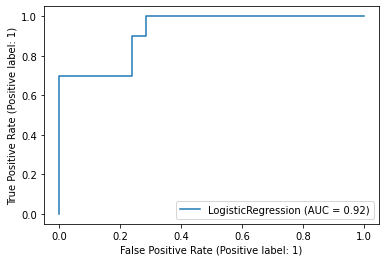

In [25]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# SVC

In [26]:
clf = SVC(random_state=0)
model = clf.fit(X, y)

In [27]:
# TODO: Represent SVC for how it makes decisions

Accuracy: 0.967741935483871
Recall: 1.0
F1: 0.9523809523809523


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


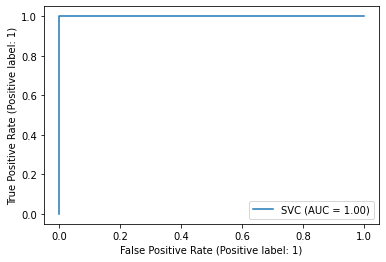

In [28]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()